In [1]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#import data set and clean up
charity = pd.read_csv('Charity.csv')
dummies = pd.get_dummies(charity.RenewalsOrAcq)
charity = pd.concat([charity, dummies], axis=1)
charity.drop(['Renewals'], inplace=True, axis=1)
charity.drop(['dob'], inplace=True, axis=1)
charity.drop(['RenewalsOrAcq'], inplace=True, axis=1)
charity.drop(['suburb'], inplace=True, axis=1)
charity.drop(['state'], inplace=True, axis=1)
charity = charity.dropna(subset=['age'])
charity['age'] = charity['age'].convert_objects(convert_numeric=True)
charity = charity.dropna(subset=['age'])
charity['postcode'] = charity['postcode'].astype(str)
charity.postcode.dtype
tax = pd.read_csv('2014tax2.csv')
tax['postcode'] = tax['postcode'].astype(str)
charity_new = pd.merge(charity, tax, on='postcode')
burs = pd.read_csv('abs2011combo.csv')
burs['postcode'] = charity_new['postcode'].astype(str)
charity_plus = pd.merge(charity_new, burs, on='postcode')
charity_plus.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,postcode,num_streets,collection_amount,donation_amount,total_received,age,gender,weekends,profitable,Acq,...,ID_NS_OcMngr,ID_NS_OcProf,ID_NS_OcTechTrdW,ID_NS_OcComPerS,ID_NS_OcClericAdm,ID_NS_OcSalesWk,ID_NS_OcMacOp_Driv,ID_NS_OcLab,ID_NS_OcID_NS,ID_NS_Tot
0,801,2,315.00,0,315.00,72,0,4,1,0,...,54,45,18,30,31,29,0,29,130,366
1,801,2,315.00,0,315.00,72,0,4,1,0,...,0,4,0,4,3,0,3,0,0,14
2,801,6,303.55,0,303.55,65,0,4,1,1,...,54,45,18,30,31,29,0,29,130,366
3,801,6,303.55,0,303.55,65,0,4,1,1,...,0,4,0,4,3,0,3,0,0,14
4,804,4,250.00,0,250.00,80,0,4,1,0,...,6,16,3,4,11,8,0,4,34,86


In [3]:
#have a look at the data
charity_new.describe(include='all')

,postcode,num_streets,collection_amount,donation_amount,total_received,age,gender,weekends,profitable,Acq,...,avg tax income,avg gross tax paid,avg net tax paid,avg salary,no pensions,avg pension,avg income,no donations,value donations,avg donation value
count,26537,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,...,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000
unique,1734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.884049,77.894208,3.726344,81.620552,62.462223,0.653993,3.352640,0.413687,0.614237,...,70939.685321,16065.531250,16455.509683,64908.680466,220.185477,7783.900419,74130.960791,4438.436937,2176361.343181,520.466051
std,NaN,2.549009,70.930426,18.705276,70.744762,14.071706,0.475705,0.871361,0.492503,0.486784,...,18500.218047,7449.238532,7642.706453,12039.629806,182.058407,802.555250,19318.228342,3438.498276,2646848.330089,683.950866
min,NaN,0.000000,-414.950000,-150.000000,-500.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,43815.137040,6350.877778,6268.537037,36581.158420,0.000000,0.000000,45580.474070,15.000000,2532.000000,109.177419
25%,NaN,1.000000,37.000000,0.000000,40.000000,54.000000,0.000000,2.000000,0.000000,0.000000,...,59571.218630,11663.791050,11967.027250,56707.959890,93.000000,7360.438202,62471.509520,1967.000000,688038.000000,296.293056
50%,NaN,2.000000,61.000000,0.000000,64.000000,65.000000,1.000000,4.000000,0.000000,1.000000,...,65394.070260,13801.708760,14161.877470,62079.569580,171.000000,7788.891304,68325.239040,3630.000000,1581155.000000,365.436559
75%,NaN,3.000000,100.000000,0.000000,101.050000,72.000000,1.000000,4.000000,1.000000,1.000000,...,76169.923410,17722.579260,18308.375090,70677.676200,301.000000,8180.023256,79465.611680,6237.000000,2836421.000000,515.263736


In [4]:
#K means clustering
from sklearn.cluster import KMeans

np.random.seed(0)

est = KMeans(n_clusters=4, init='random')
est.fit(charity_new)
y_kmeans = est.predict(charity_new)



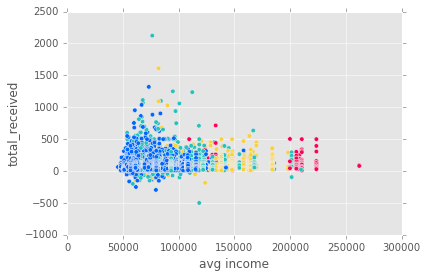

In [18]:
#plot the clusters
colors = np.array(['#FF0054','#FBD039','#23C2BC','#0066ff'])
plt.figure()
charity_new.plot(kind='scatter', x='avg income', y='total_received',c=colors[y_kmeans])

In [11]:
est.cluster_centers_

array([[  2.96246635e+03,   1.94230769e+00,   1.14996875e+02,
          1.25860577e+01,   1.27582933e+02,   6.60288462e+01,
          6.82692308e-01,   3.91346154e+00,   6.10576923e-01,
          7.35576923e-01,   1.08334856e+04,   1.48006913e+05,
          4.84536727e+04,   4.96764431e+04,   1.00586051e+05,
          1.06975962e+02,   8.76003253e+03,   1.56702098e+05,
          4.77169712e+03,   2.25198388e+07,   5.49853247e+03],
       [  3.44983039e+03,   2.60455390e+00,   8.99086199e+01,
          5.21340613e+00,   9.51220260e+01,   6.20585502e+01,
          6.55204461e-01,   3.32946097e+00,   4.91635688e-01,
          6.11059480e-01,   2.15132914e+04,   9.14862352e+04,
          2.43448358e+04,   2.50085417e+04,   7.72676323e+04,
          4.04276487e+02,   7.90580983e+03,   9.56155863e+04,
          9.51065195e+03,   6.56930162e+06,   1.08562337e+03],
       [  3.88709613e+03,   2.32959376e+00,   8.07849362e+01,
          3.81888758e+00,   8.46038238e+01,   6.19750827e+01,
      

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


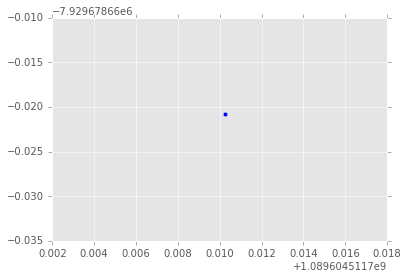

In [22]:
from sklearn import decomposition

X = charity_new.filter(regex="[^total_received|^collection_amount|^donation_amount]")
y = charity_new.total_received

pca = decomposition.PCA(n_components=2)
X_r = pca.fit_transform(X)
target_names = charity_new.total_received

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y <= i, 0], X_r[y > i, 1], c=c, label=target_name)


In [23]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
decomposition.PCA(copy=True, n_components=3, whiten=False)
print(pca.explained_variance_ratio_) 

[ 0.98472466  0.01215417  0.00167454]


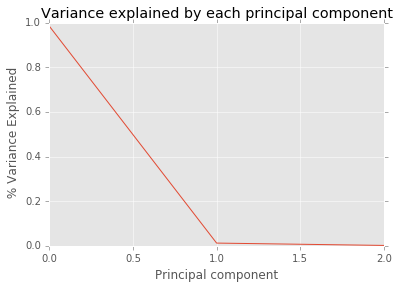

In [24]:
plt.cla()
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')

In [ ]:
#Try Decision Trees
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [ ]:
#split data up for training
charity = d['Survived'].copy(deep=True)
del d['Survived']

d

In [ ]:
y = charity.array('total_received')
print y

In [ ]:
X = charity
#X.drop('total_received', axis=1, inplace=True)
#X.drop('collection_amount', axis=1, inplace=True)
#X.drop('donation_amount', axis=1, inplace=True)
#y = X.total_received()
X.describe(include='all')

In [ ]:
#PCA Analysis
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=1)
X_r = pca.fit_transform(X)

y = charity.total_received()

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')

In [ ]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
# generate some data to play with
#X, y = samples_generator.make_classification(
# n_informative=5, n_redundant=0, random_state=42)
# ANOVA SVM-C
#anova_filter = SelectKBest(f_regression, k=5)
#clf = svm.SVC(kernel='linear')
#anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
>>> # You can set the parameters using the names issued
>>> # For instance, fit using a k of 10 in the SelectKBest
>>> # and a parameter 'C' of the svm
>>> anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)
...                                              
Pipeline(steps=[...])
>>> prediction = anova_svm.predict(X)
>>> anova_svm.score(X, y)                        
0.77...
>>> # getting the selected features chosen by anova_filter
>>> anova_svm.named_steps['anova'].get_support()
... 
array([ True,  True,  True, False, False,  True, False,  True,  True, True,
       False, False,  True, False,  True, False, False, False, False,
       True], dtype=bool)